In [1]:
import uproot3
import dask.dataframe as dd
import time
from dask import delayed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


In [5]:
def get_pandasDataFrame(process,path,fileName,treeName):
    eventsPhoton  = uproot3.open(path+fileName)[treeName]
    pd_dataframe  = eventsPhoton.pandas.df()
    pd_dataframe['Process'] = process
    print(type(pd_dataframe))
    return pd_dataframe

In [6]:
start = time.time()

qcd_df=get_pandasDataFrame("QCD","/eos/user/r/rchudasa/SWAN_projects/photonID-pp-Run2/makeInputTrees/workarea/",
                           "mc_qcd20To30EmEnriched_barrel.root",
                           "mergedPi0_SCTree")

pi0_df=get_pandasDataFrame("Flat_pi0","/eos/user/r/rchudasa/SWAN_projects/photonID-pp-Run2/makeInputTrees/workarea/",
                           "mc_bkg_flat_pi0_barrel.root",
                           "mergedPi0_SCTree")

data_df=get_pandasDataFrame("data","/eos/user/r/rchudasa/SWAN_projects/photonID-pp-Run2/makeInputTrees/workarea/",
                            "data_2018D_barrel.root",
                            "dataAllSCTree")

bkg_df = pd.concat([qcd_df,pi0_df,data_df])
end  = time.time()
print("Execution time is", end-start)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Execution time is 12.01407265663147


In [8]:
dfs=[]
dfs.append(delayed(bkg_df))
daskframe = dd.from_delayed(dfs)

In [9]:
final_df = daskframe.compute()
final_df.reset_index(inplace=True, drop=True)

In [10]:
final_df.head(10)

,scE,scEt,scRawE,scEta,scPhi,scX,scY,scZ,scEtaWidth,scPhiWidth,scRawEt,scMinDrWithGsfElectornSC_,scFoundGsfMatch_,scE5x5,scE2x2Ratio,scE3x3Ratio,scEMaxRatio,scE2ndRatio,scETopRatio,scERightRatio,scEBottomRatio,scELeftRatio,scE2x5_MaxRatio,scE2x5TopRatio,scE2x5RightRatio,scE2x5BottomRatio,scE2x5LeftRatio,scSwissCross,scR9,scSigmaIetaIeta,scSigmaIetaIphi,scSigmaIphiIphi,scFull5x5_E5x5,scFull5x5_E2x2Ratio,scFull5x5_E3x3Ratio,scFull5x5_EMaxRatio,scFull5x5_E2ndRatio,scFull5x5_ETopRatio,scFull5x5_ERightRatio,scFull5x5_EBottomRatio,scFull5x5_ELeftRatio,scFull5x5_E2x5MaxRatio,scFull5x5_E2x5TopRatio,scFull5x5_E2x5RightRatio,scFull5x5_E2x5BottomRatio,scFull5x5_E2x5LeftRatio,scFull5x5_SwissCross,scFull5x5_R9,scFull5x5_SigmaIetaIeta,scFull5x5_SigmaIetaIphi,scFull5x5_SigmaIphiIphi,scPFChIso1,scPFChIso2,scPFChIso3,scPFChIso4,scPFChIso5,scPFPhoIso1,scPFPhoIso2,scPFPhoIso3,scPFPhoIso4,scPFPhoIso5,scPFNeuIso1,scPFNeuIso2,scPFNeuIso3,scPFNeuIso4,scPFNeuIso5,scClusterECAL_nClusInDr0p1,scClusterECAL_nClusInDr0p3,scClusterECAL_nClusInDr0p5,scClusterECAL_sumPtInDr0p1,scClusterECAL_sumPtInDr0p3,scClusterECAL_sumPtInDr0p5,scClusterECAL_sumSizesInDr0p1,scClusterECAL_sumSizesInDr0p3,scClusterECAL_sumSizesInDr0p5,scClusterECAL_closestClusDr,scClusterECAL_closest2ClusDr,scClusterECAL_closest3ClusDr,scClusterHCAL_nClusInDr0p1,scClusterHCAL_nClusInDr0p3,scClusterHCAL_nClusInDr0p5,scClusterHCAL_sumPtInDr0p1,scClusterHCAL_sumPtInDr0p3,scClusterHCAL_sumPtInDr0p5,scClusterHCAL_sumSizesInDr0p1,scClusterHCAL_sumSizesInDr0p3,scClusterHCAL_sumSizesInDr0p5,scClusterHCAL_closestClusDr,scClusterHCAL_closest2ClusDr,scClusterHCAL_closest3ClusDr,scPF_nGammaInDr0p1,scPF_nCHadronInDr0p1,scPF_nNHadronInDr0p1,scPF_nElectronInDr0p1,scPF_nOtherInDr0p1,scPF_sumPtGammaInDr0p1,scPF_sumPtCHadronInDr0p1,scPF_sumPtNHadronInDr0p1,scPF_sumPtElectronInDr0p1,scPF_sumPtOtherInDr0p1,scPF_nGammaInDr0p3,scPF_nCHadronInDr0p3,scPF_nNHadronInDr0p3,scPF_nElectronInDr0p3,scPF_nOtherInDr0p3,scPF_sumPtGammaInDr0p3,scPF_sumPtCHadronInDr0p3,scPF_sumPtNHadronInDr0p3,scPF_sumPtElectronInDr0p3,scPF_sumPtOtherInDr0p3,scPF_nGammaInDr0p5,scPF_nCHadronInDr0p5,scPF_nNHadronInDr0p5,scPF_nElectronInDr0p5,scPF_nOtherInDr0p5,scPF_sumPtGammaInDr0p5,scPF_sumPtCHadronInDr0p5,scPF_sumPtNHadronInDr0p5,scPF_sumPtElectronInDr0p5,scPF_sumPtOtherInDr0p5,scECAL_energyMatrix[0],scECAL_energyMatrix[1],scECAL_energyMatrix[2],scECAL_energyMatrix[3],scECAL_energyMatrix[4],scECAL_energyMatrix[5],scECAL_energyMatrix[6],scECAL_energyMatrix[7],scECAL_energyMatrix[8],scECAL_energyMatrix[9],scECAL_energyMatrix[10],scECAL_energyMatrix[11],scECAL_energyMatrix[12],scECAL_energyMatrix[13],scECAL_energyMatrix[14],scECAL_energyMatrix[15],scECAL_energyMatrix[16],scECAL_energyMatrix[17],scECAL_energyMatrix[18],scECAL_energyMatrix[19],scECAL_energyMatrix[20],scECAL_energyMatrix[21],scECAL_energyMatrix[22],scECAL_energyMatrix[23],scECAL_energyMatrix[24],Process
0,21.240915,21.070301,19.558355,0.127173,-3.080385,-137.763031,-8.442690,17.599916,0.009749,0.060299,19.401257,1.000000e+09,0.0,19.228792,0.967122,0.967122,0.442778,0.232240,0.095579,0.000000,0.000000,0.232240,0.967121,0.308414,0.000000,0.000000,0.461644,0.259632,0.950825,0.011361,0.000015,0.008945,20.518225,0.906344,0.933342,0.414952,0.217645,0.089572,0.008853,0.000000,0.217645,0.933908,0.314301,0.025956,0.028722,0.463538,0.238297,0.979148,0.011313,0.000016,0.009061,0.000000,3.612482,8.079893,16.424385,21.772127,20.299665,21.070431,23.034956,24.251040,25.405054,0.00000,0.000000,0.000000,1.187251,1.187251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.299665,0.000000,0.00000,0.0,0.00000,5.0,11.0,0.0,0.0,0.0,23.034958,8.079893,0.000000,0.0,0.00000,9.0,26.0,1.0,0.0,0.0,25.405056,21.772127,1.187251,0.0,0.00000,2.298548e+15,1.544791e-41,2.298548e+15,1.544791e-41,8.813633e-10,11213.359375,9.764696e-39,0.0,3.281207e-37,0.0,7.006492e-45,0.0,2.760364e+20,1.625506e-43,0.0,0.0,3.281214e-37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Q

In [14]:
for i in final_df.columns:
    print("'"+i+"',")

'scE',
'scEt',
'scRawE',
'scEta',
'scPhi',
'scX',
'scY',
'scZ',
'scEtaWidth',
'scPhiWidth',
'scRawEt',
'scMinDrWithGsfElectornSC_',
'scFoundGsfMatch_',
'scE5x5',
'scE2x2Ratio',
'scE3x3Ratio',
'scEMaxRatio',
'scE2ndRatio',
'scETopRatio',
'scERightRatio',
'scEBottomRatio',
'scELeftRatio',
'scE2x5_MaxRatio',
'scE2x5TopRatio',
'scE2x5RightRatio',
'scE2x5BottomRatio',
'scE2x5LeftRatio',
'scSwissCross',
'scR9',
'scSigmaIetaIeta',
'scSigmaIetaIphi',
'scSigmaIphiIphi',
'scFull5x5_E5x5',
'scFull5x5_E2x2Ratio',
'scFull5x5_E3x3Ratio',
'scFull5x5_EMaxRatio',
'scFull5x5_E2ndRatio',
'scFull5x5_ETopRatio',
'scFull5x5_ERightRatio',
'scFull5x5_EBottomRatio',
'scFull5x5_ELeftRatio',
'scFull5x5_E2x5MaxRatio',
'scFull5x5_E2x5TopRatio',
'scFull5x5_E2x5RightRatio',
'scFull5x5_E2x5BottomRatio',
'scFull5x5_E2x5LeftRatio',
'scFull5x5_SwissCross',
'scFull5x5_R9',
'scFull5x5_SigmaIetaIeta',
'scFull5x5_SigmaIetaIphi',
'scFull5x5_SigmaIphiIphi',
'scPFChIso1',
'scPFChIso2',
'scPFChIso3',
'scPFChIso4',
'scPFChIso5',

In [2]:
def get_pandasDataFrame(process,path,fileName,treeName):
    #path = '/eos/cms/store/group/phys_diffraction/lbyl_2018/mc_flat_pt_photon/mvaTrees_18April22/'
    #fileName = path + ('mvaTrees_{}.root').format(i)
    #fileName = path + 'mergedMVAPhotonTree.root'
    #treeName = 'genMatchedSCTree'
    eventsPhoton  = uproot3.open(path+fileName)[treeName]
    pd_dataframe  = eventsPhoton.pandas.df()
    
    pd_dataframe['E4']            = pd_dataframe['phoETop'] + pd_dataframe['phoEBottom'] + pd_dataframe['phoELeft'] + pd_dataframe['phoERight']
    pd_dataframe['phoSwissCross'] = 1 - (pd_dataframe['E4']/pd_dataframe['phoMaxEnergyXtal'])
    pd_dataframe['E4_2012']       = pd_dataframe['phoETop_2012'] + pd_dataframe['phoEBottom_2012'] + pd_dataframe['phoELeft_2012'] + pd_dataframe['phoERight_2012']
    pd_dataframe['phoSwissCross_2012'] = 1 - (pd_dataframe['E4_2012']/pd_dataframe['phoMaxEnergyXtal_2012'])
    if(process=='photon'):
        pd_dataframe['isPhoton'] = True
    else:
        pd_dataframe['isPhoton'] = False
    print(type(pd_dataframe))
    return pd_dataframe

In [3]:
processes = {'photon':{'path':'/eos/cms/store/group/phys_diffraction/lbyl_2018/mc_flat_pt_photon/mvaTrees_18April22/',
                 'fileName':'mergedMVAPhotonTree.root',
                 'treeName':'genMatchedSCTree'},
         'pi0':{'path':'/eos/cms/store/group/phys_diffraction/lbyl_2018/mc_flat_pt_pi0/mvaTrees_13April22/',
                 'fileName':'mergedMVAPi0Tree.root',
                 'treeName':'mergedPi0_SCTree'},
       }

In [4]:
dfs= []
start = time.time()
for process in processes:
    path = processes[process]['path']
    fileName = processes[process]['fileName']
    treeName = processes[process]['treeName']
    #print(path,fileName,treeName)
    dfs.append(delayed(get_pandasDataFrame(process,path,fileName,treeName)))
end  = time.time()
print("Execution time is", end-start)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Execution time is 32.57226920127869


In [5]:
start = time.time()
daskframe = dd.from_delayed(dfs)
final_df = daskframe.compute()
final_df.reset_index(inplace=True, drop=True)
end  = time.time()
print("Execution time is", end-start)

Execution time is 4.485052585601807


In [6]:
final_df

,phoE,phoEt,phoEta,phoPhi,phoSCE,phoSCEt,phoSCRawE,phoSCEta,phoSCPhi,phoSCEtaWidth,...,pfcIso1pTgt3p0subUE,pfcIso2pTgt3p0subUE,pfcIso3pTgt3p0subUE,pfcIso4pTgt3p0subUE,pfcIso5pTgt3p0subUE,E4,phoSwissCross,E4_2012,phoSwissCross_2012,isPhoton
0,60.685730,11.943848,-2.308812,0.368829,58.990402,11.645277,57.464531,-2.305733,0.369446,1.743103e-02,...,0.0,0.0,0.0,0.0,0.0,22.452289,0.300362,22.742539,0.291318,True
1,61.699818,12.183805,2.305426,-2.761272,59.748920,11.762824,50.684441,2.308521,-2.761886,2.029500e-02,...,0.0,0.0,0.0,0.0,0.0,18.859917,0.099529,18.859917,0.099529,True
2,67.019653,13.601509,2.277493,1.410259,62.471405,12.653736,55.508812,2.279485,1.410225,1.900969e-02,...,0.0,0.0,0.0,0.0,0.0,22.186934,-0.176036,22.495416,-0.192387,True
3,49.054188,9.784245,-2.295202,-1.749702,42.847073,8.562777,35.417217,-2.293223,-1.749680,1.720828e-02,...,0.0,0.0,0.0,0.0,0.0,8.720156,0.576922,9.227234,0.552320,True
4,2.304482,2.268903,-0.176863,-0.132823,2.520204,2.484036,1.997789,-0.170439,-0.132472,4.904437e-09,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.230007,0.884869,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444181,18.719315,18.706396,-0.037162,1.064047,18.710409,18.701578,18.280699,-0.030732,1.064149,9.059383e-03,...,0.0,0.0,0.0,0.0,0.0,4.831727,0.607168,4.831727,0.607168,False
1444182,35.167850,12.895886,-1.660921,-2.671993,31.158571,11.450430,25.702745,-1.658597,-2.672285,1.262086e-02,...,0.0,0.0,0.0,0.0,0.0,3.639933,0.550044,3.945033,0.512328,False
1444183,37.411236,13.584595,1.671458,0.478592,36.454502,13.208401,31.199907,1.673794,0.478887,1.114955e-02,...,0.0,0.0,0.0,0.0,0.0,11.515555,0.281344,11.762614,0.265926,False
1444184,18.626551,16.854322,-0.454658,1.242256,18.365076,16.659769,17.875591,-0.448688,1.242298,7.104971e-03,...,0.0,0.0,0.0,0.0,0.0,4.129053,0.671182,4.129053,0.671182,False


In [7]:
photon_df = final_df[final_df['isPhoton'] == True]
pi0_df = final_df[final_df['isPhoton'] == False]

In [ ]:
sns.pairplot(data=photon_df)

In [8]:
corr = photon_df.corr()

<AxesSubplot:>

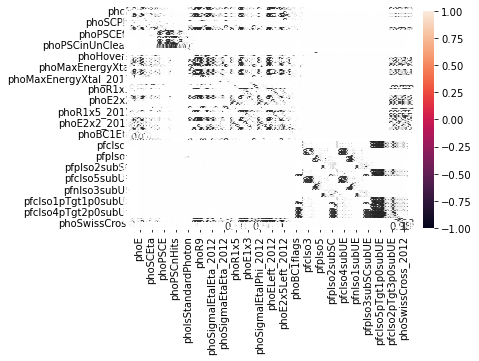

In [9]:
sns.heatmap(corr, annot=True)

In [8]:
def plotSingleVarBins(feature,bins):
    fig, ax = plt.subplots(figsize=(7, 7))
    sns.histplot(data=photon_df[feature], element="step",fill=False, bins=bins, linewidth=2, color="b", label = 'Photon')
    sns.histplot(data=pi0_df[feature],    element="step",fill=False, bins=bins, linewidth=2, color="r", label = 'Pi0')
    #sns.histplot(data=photon_df[features[i]], ax=ax[r,c], element="step",fill=False, bins=bins[i], linewidth=2, color="b", label = 'Photon')
    #sns.histplot(data=pi0_df[features[i]],    ax=ax[r,c], element="step",fill=False, bins=bins[i], linewidth=2, color="r", label = 'Pi0')
    plt.legend(loc='upper right')
    ax.set_yscale("log")
    plt.savefig('figures/{}.pdf'.format(feature))

## Plot Charged Isolation 

/tmp/ipykernel_1260/4046291202.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(7, 7))


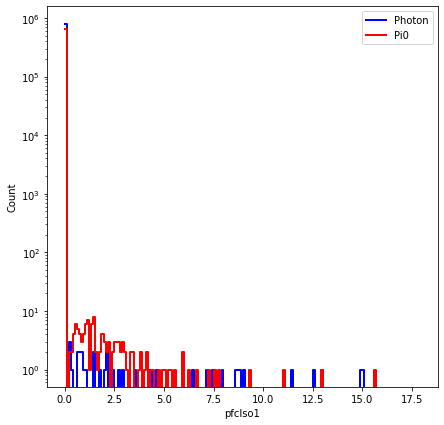

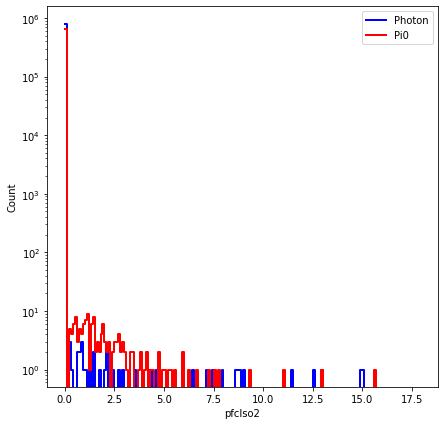

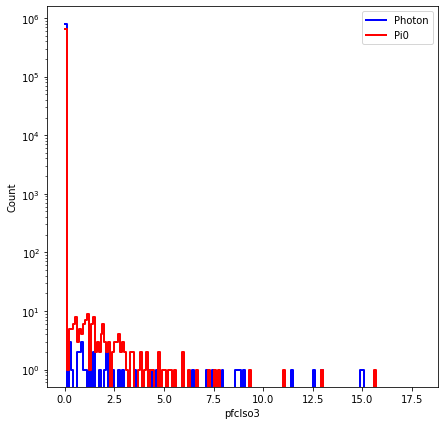

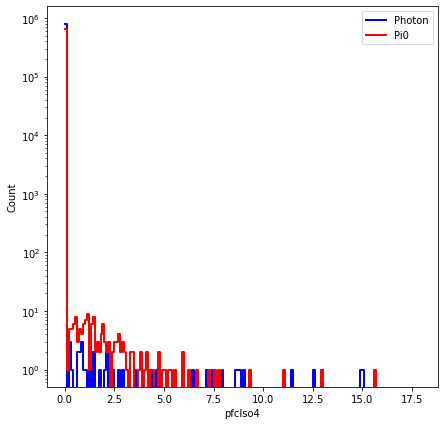

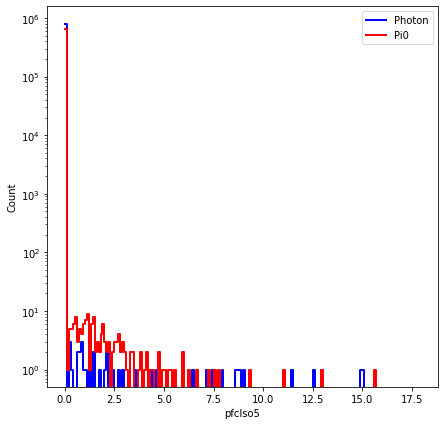

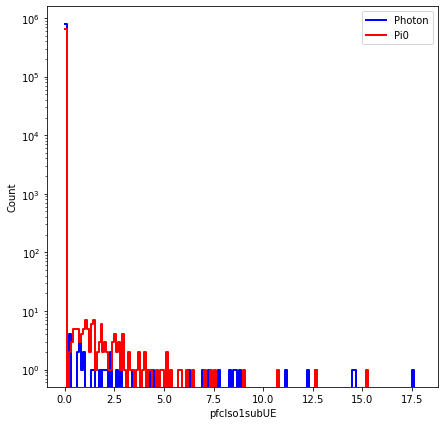

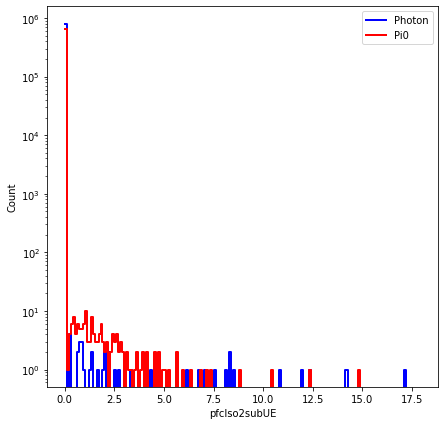

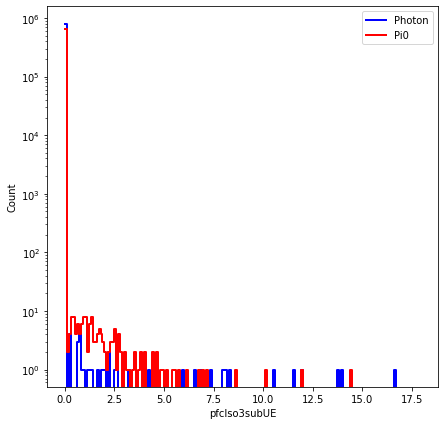

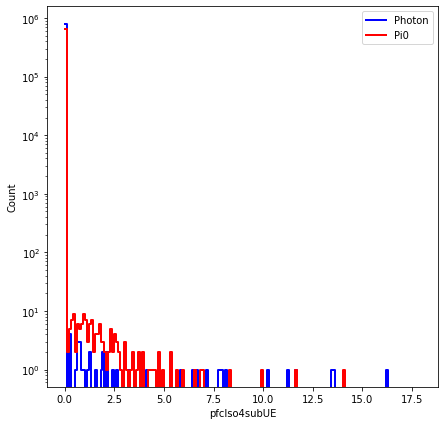

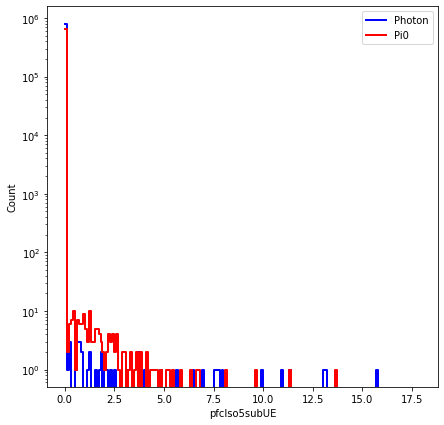

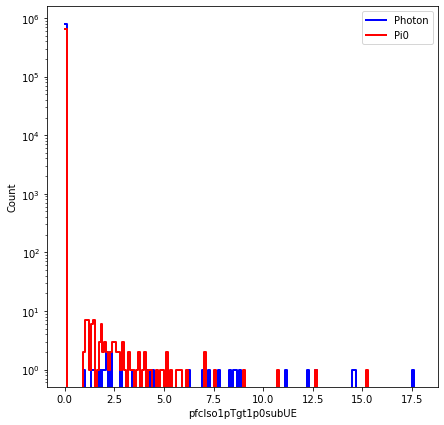

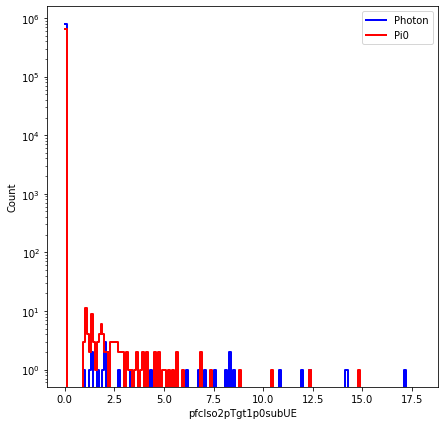

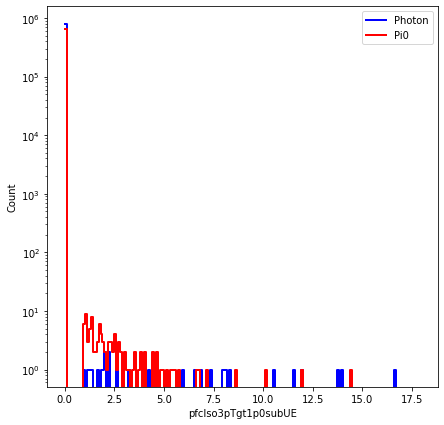

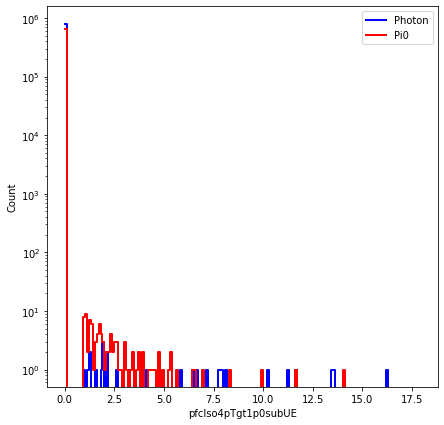

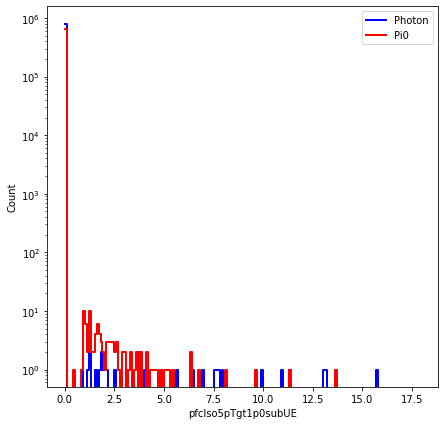

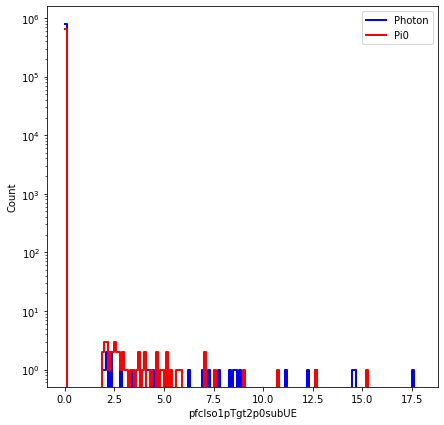

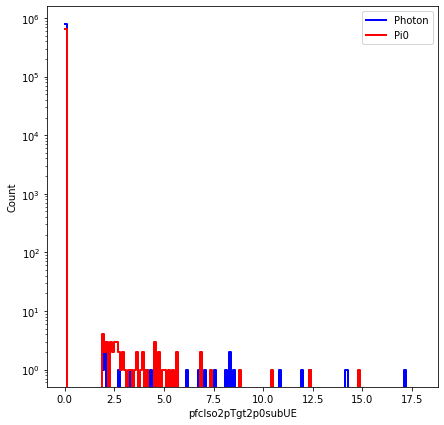

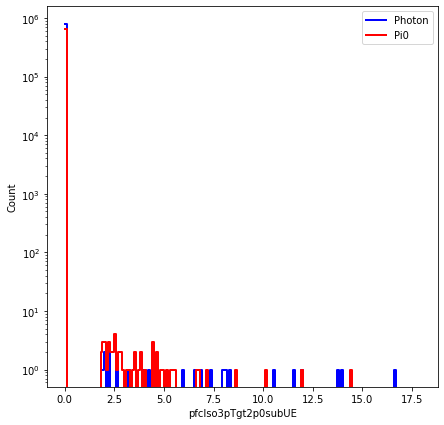

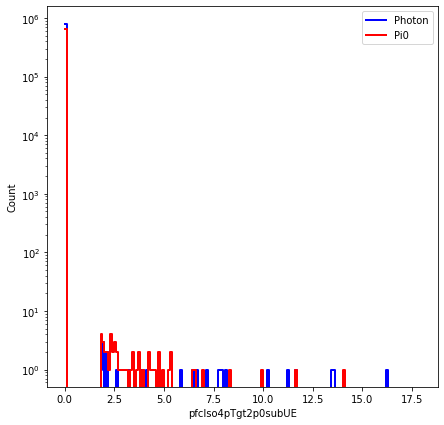

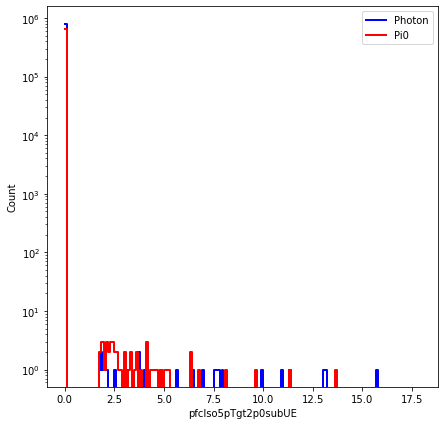

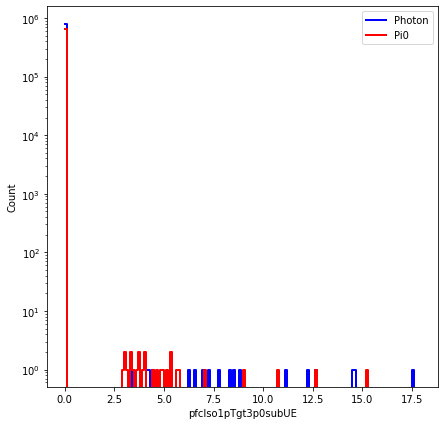

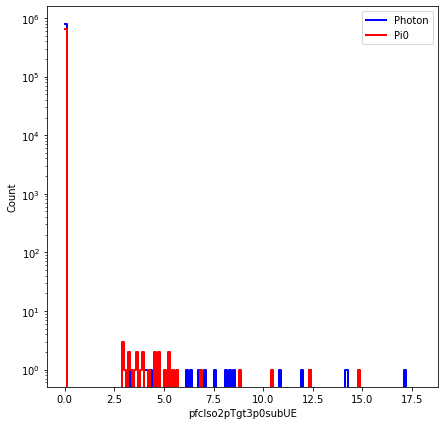

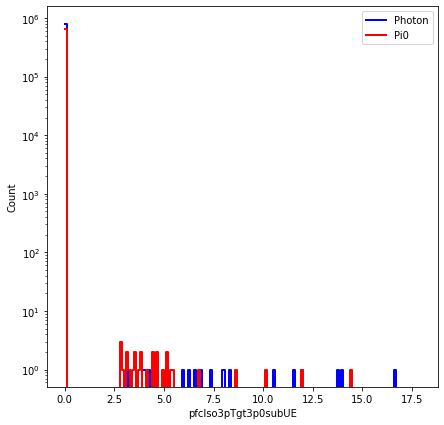

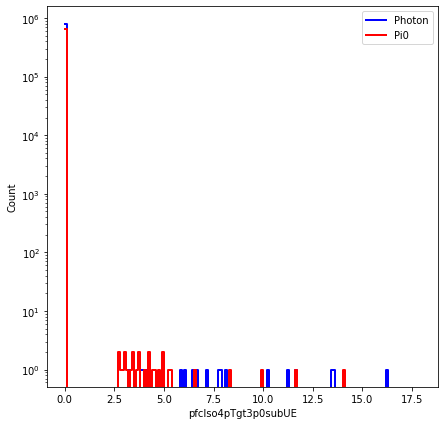

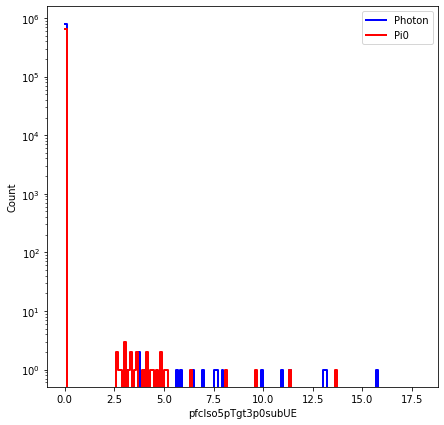

In [9]:
features_ChargedIso =['pfcIso1',
 'pfcIso2',
 'pfcIso3',
 'pfcIso4',
 'pfcIso5',
 'pfcIso1subUE',
 'pfcIso2subUE',
 'pfcIso3subUE',
 'pfcIso4subUE',
 'pfcIso5subUE',
 'pfcIso1pTgt1p0subUE',
 'pfcIso2pTgt1p0subUE',
 'pfcIso3pTgt1p0subUE',
 'pfcIso4pTgt1p0subUE',
 'pfcIso5pTgt1p0subUE',
 'pfcIso1pTgt2p0subUE',
 'pfcIso2pTgt2p0subUE',
 'pfcIso3pTgt2p0subUE',
 'pfcIso4pTgt2p0subUE',
 'pfcIso5pTgt2p0subUE',
 'pfcIso1pTgt3p0subUE',
 'pfcIso2pTgt3p0subUE',
 'pfcIso3pTgt3p0subUE',
 'pfcIso4pTgt3p0subUE',
 'pfcIso5pTgt3p0subUE']
for i in features_ChargedIso:
    #plotSingleVarChargedIso(i)
    plotSingleVarBins(i,bins=np.arange(0,18,0.1).tolist())

## Plot photon isolation variables 

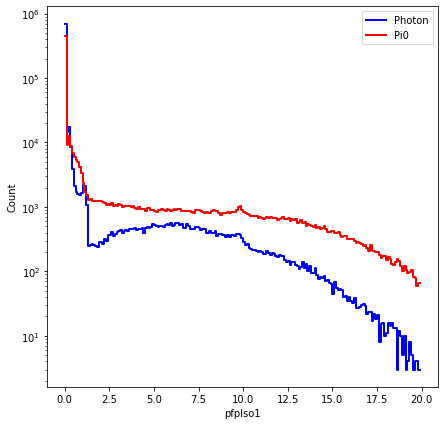

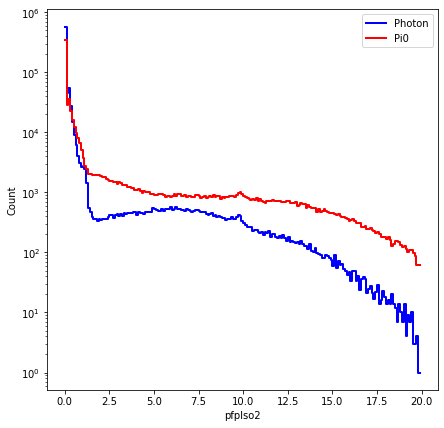

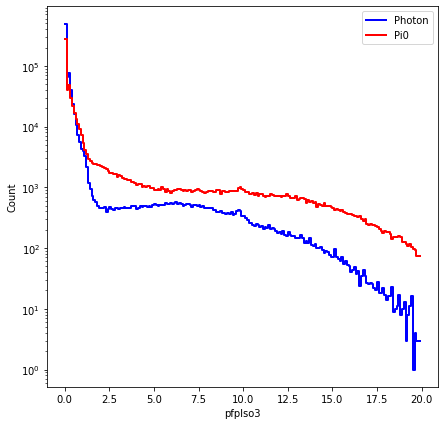

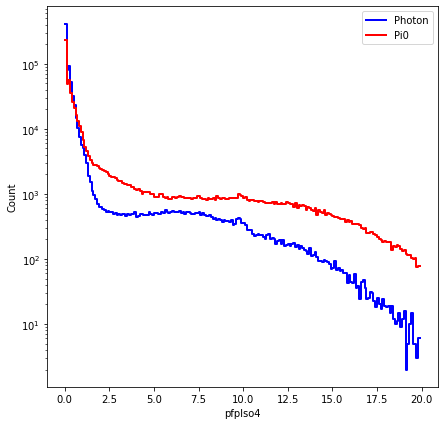

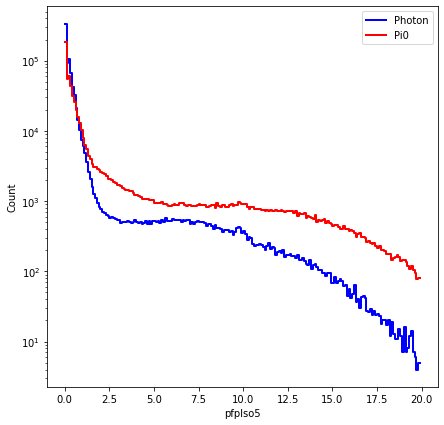

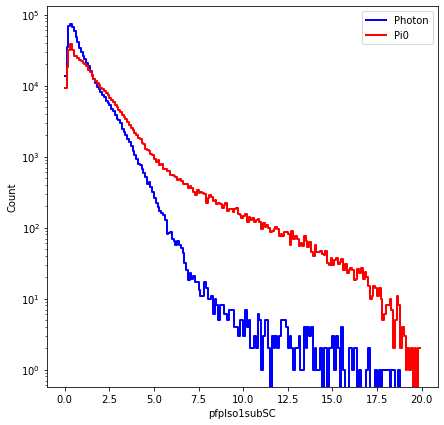

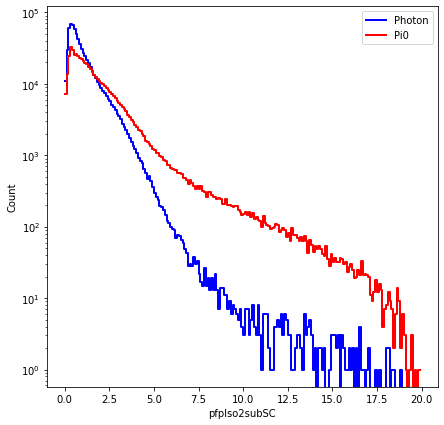

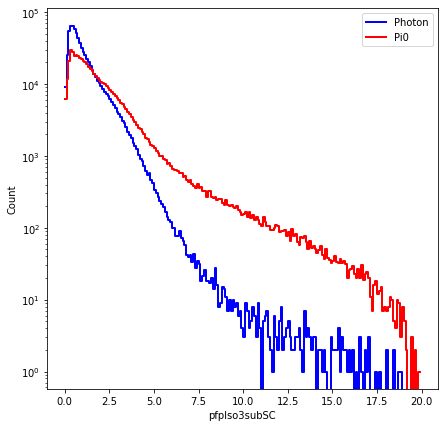

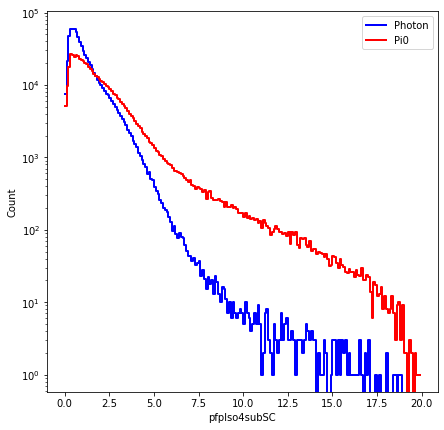

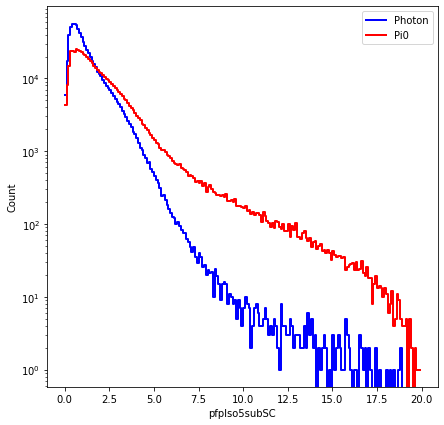

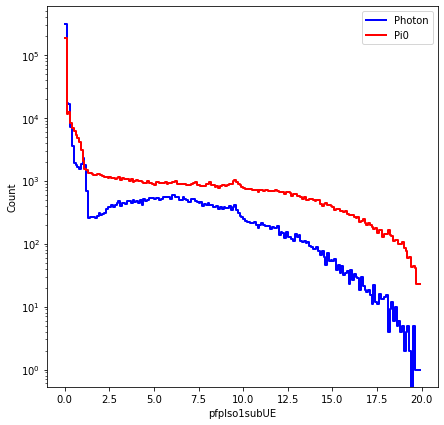

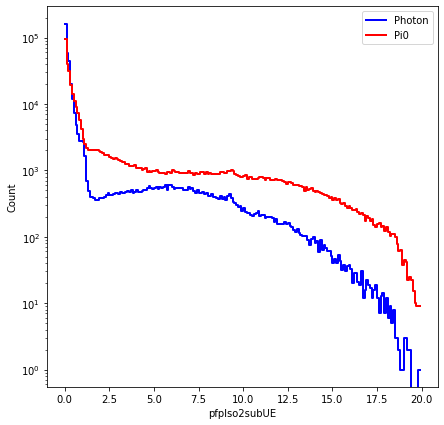

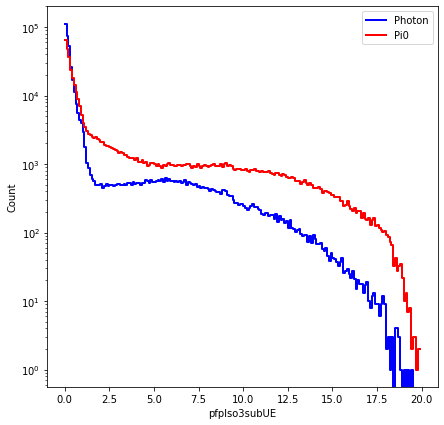

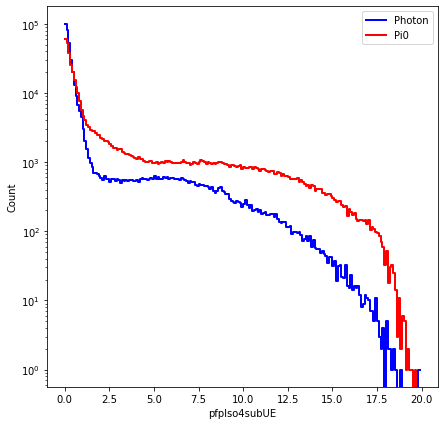

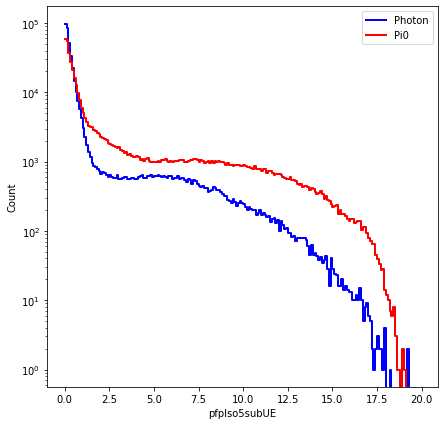

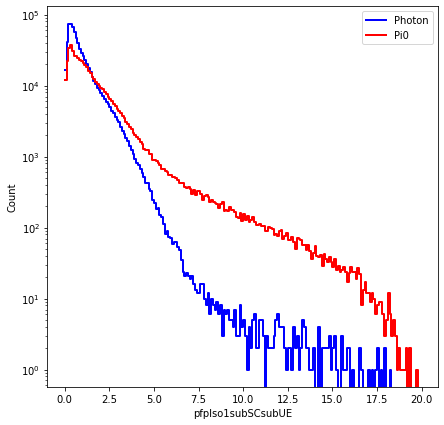

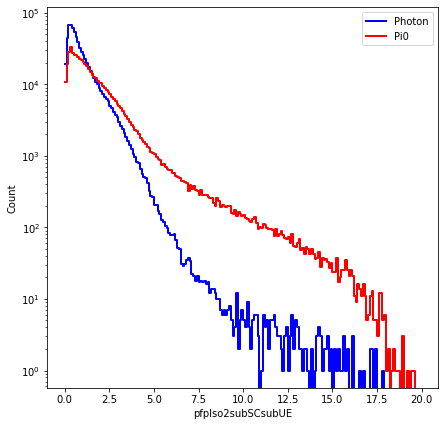

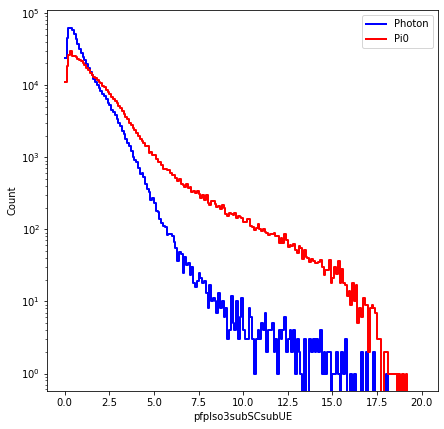

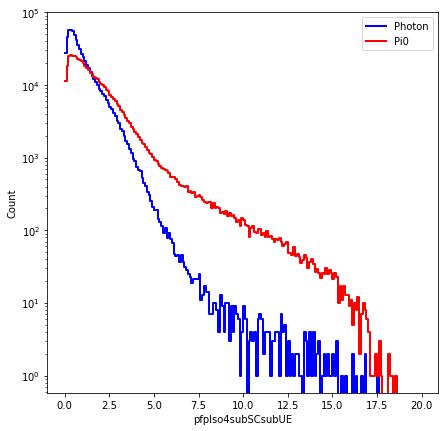

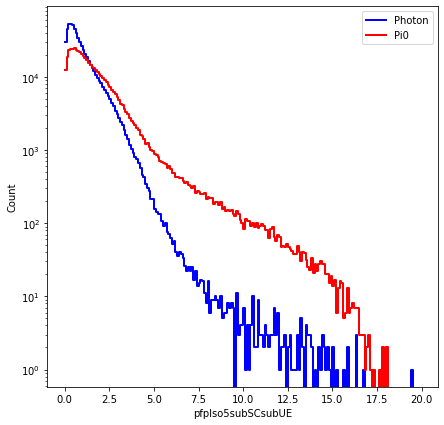

In [10]:
features_PhotonIso = [
 'pfpIso1',
 'pfpIso2',
 'pfpIso3',
 'pfpIso4',
 'pfpIso5',               
 'pfpIso1subSC',
 'pfpIso2subSC',
 'pfpIso3subSC',
 'pfpIso4subSC',
 'pfpIso5subSC',
 'pfpIso1subUE',
 'pfpIso2subUE',
 'pfpIso3subUE',
 'pfpIso4subUE',
 'pfpIso5subUE',
 'pfpIso1subSCsubUE',
 'pfpIso2subSCsubUE',
 'pfpIso3subSCsubUE',
 'pfpIso4subSCsubUE',
 'pfpIso5subSCsubUE'
]
for i in features_PhotonIso:
    plotSingleVarBins(i,bins=np.arange(0,20,0.1).tolist())

## Plot neutral isolation variables 

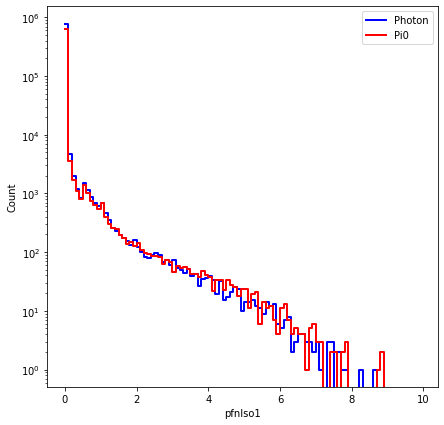

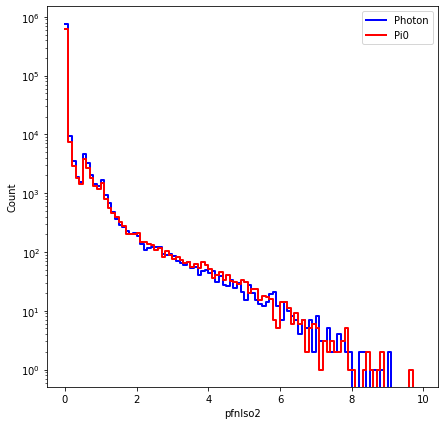

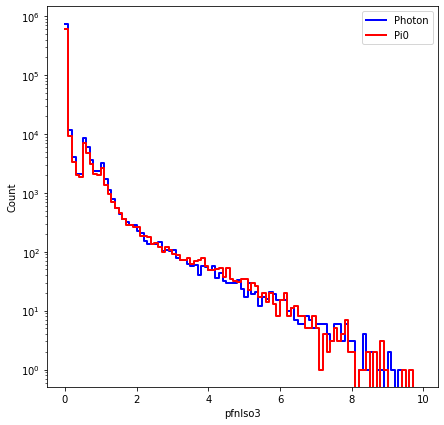

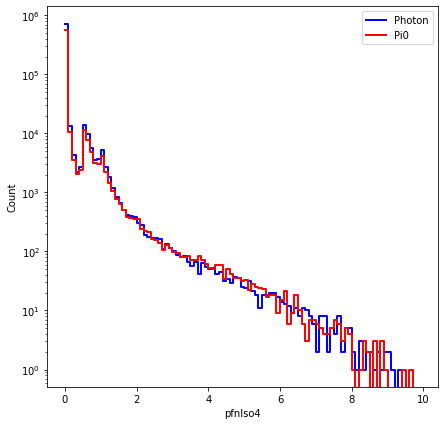

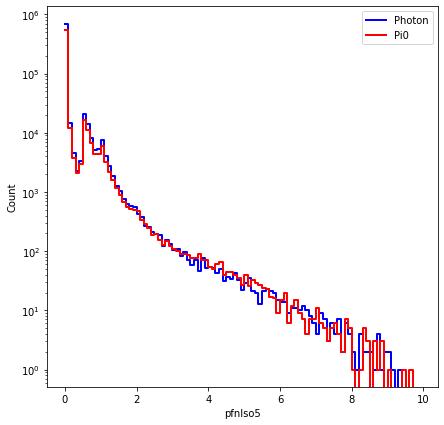

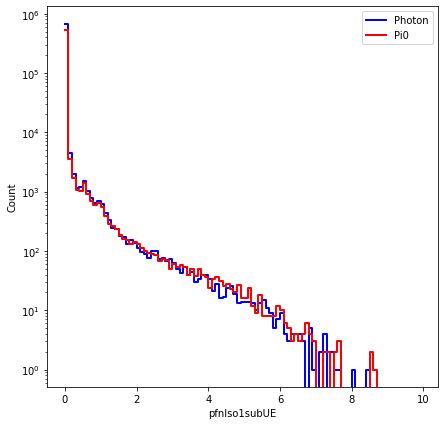

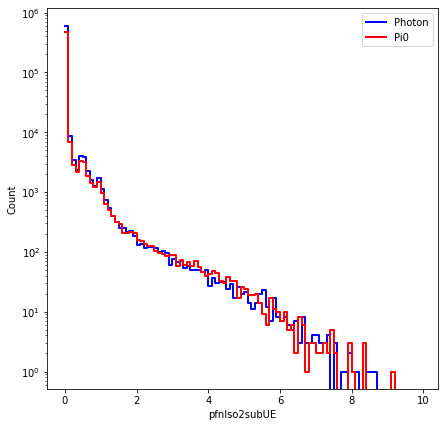

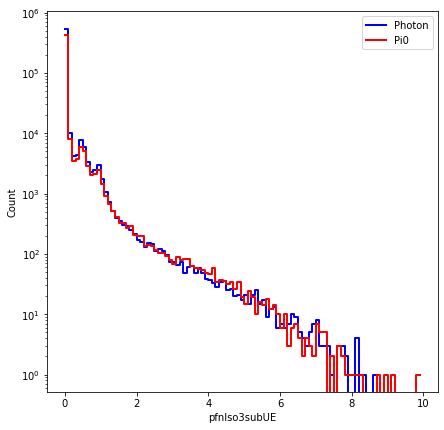

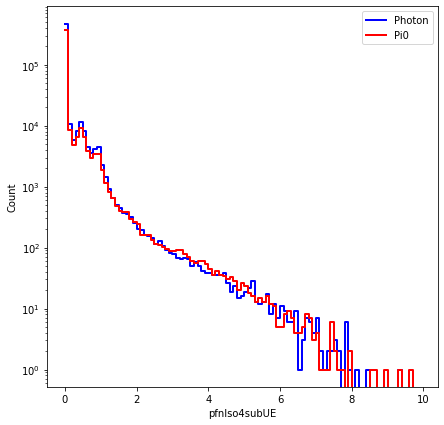

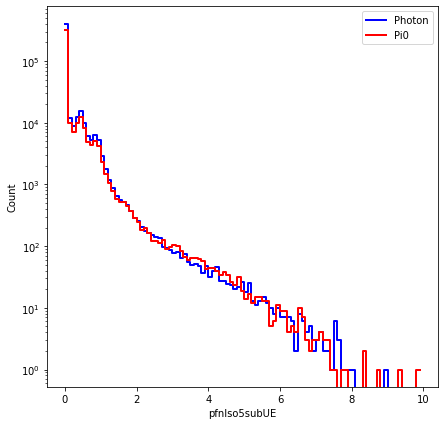

In [11]:
features_NeutralIso =[   
 'pfnIso1',
 'pfnIso2',
 'pfnIso3',
 'pfnIso4',
 'pfnIso5',
 'pfnIso1subUE',
 'pfnIso2subUE',
 'pfnIso3subUE',
 'pfnIso4subUE',
 'pfnIso5subUE'
]
for i in features_NeutralIso:
    plotSingleVarBins(i,bins=np.arange(0,10,0.1).tolist())
        

## Plot shower energies 

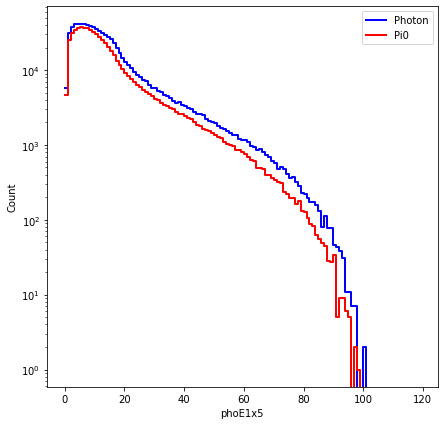

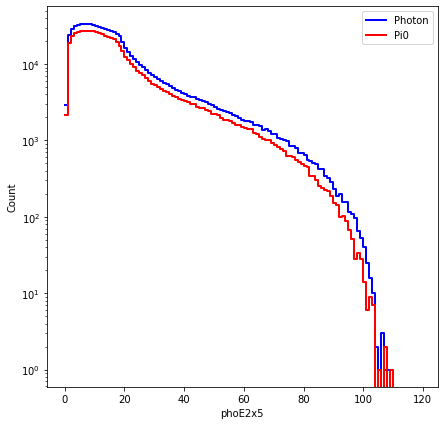

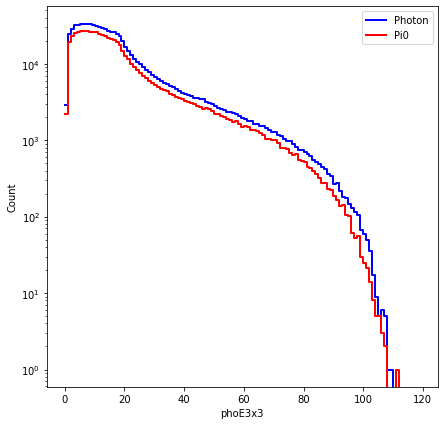

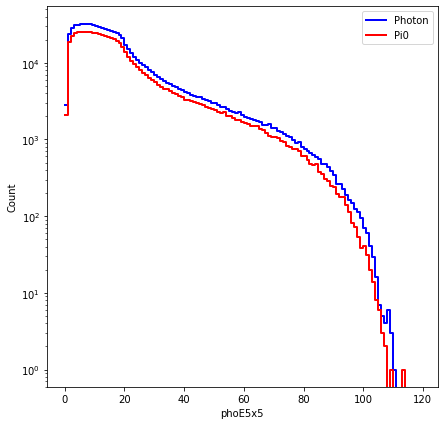

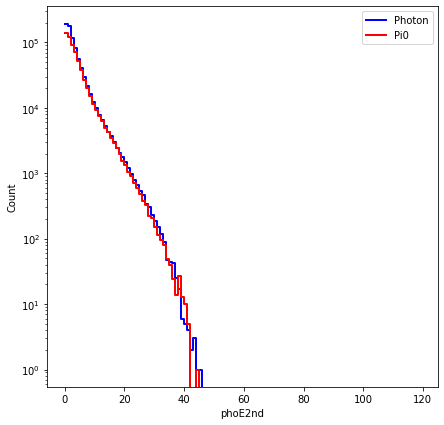

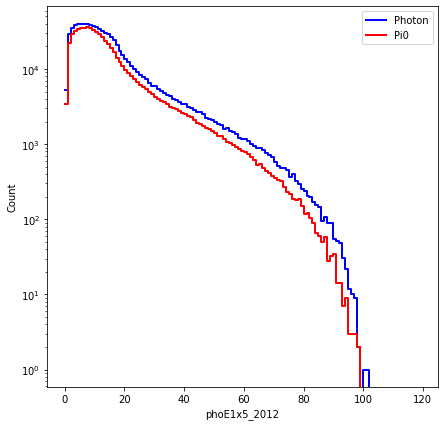

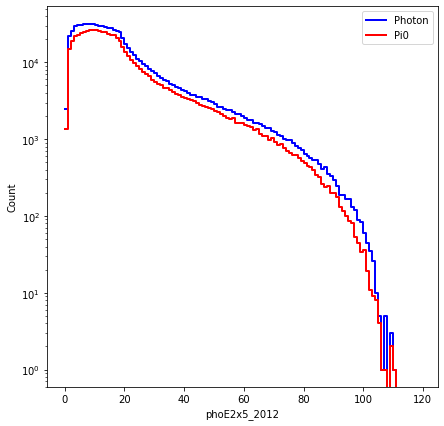

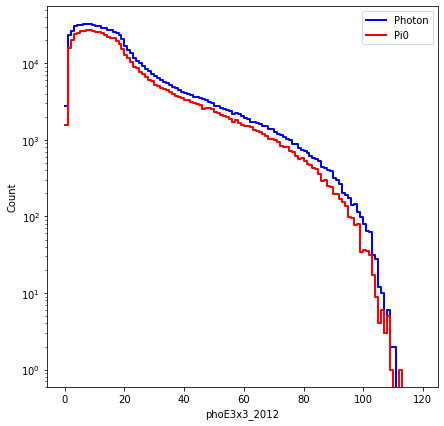

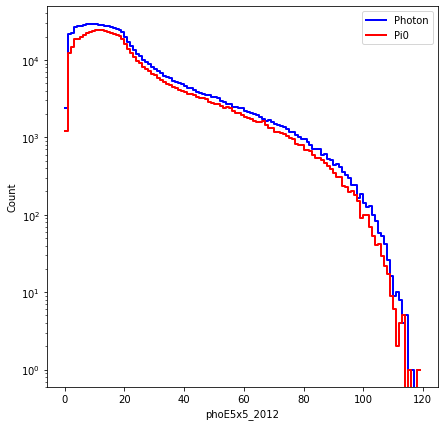

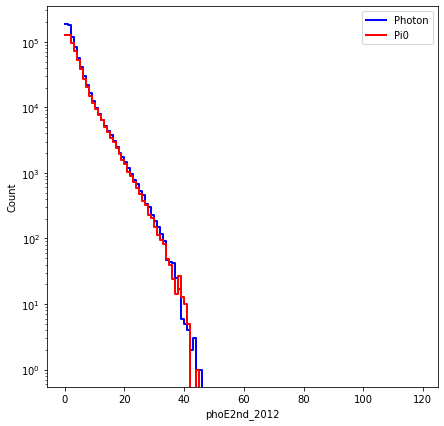

In [12]:
features_ShowerEnergy = ['phoE1x5',
                         'phoE2x5',
                         'phoE3x3',
                         'phoE5x5',
                         'phoE2nd',
                         'phoE1x5_2012',
                         'phoE2x5_2012',
                         'phoE3x3_2012',
                         'phoE5x5_2012',
                         'phoE2nd_2012'   
]
for i in features_ShowerEnergy:
    plotSingleVarBins(i,bins=np.arange(0,120,1).tolist())

## Plot shower widths 

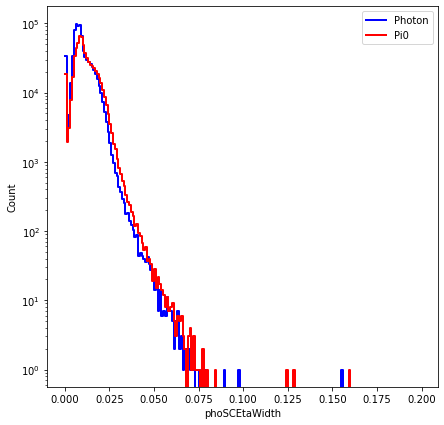

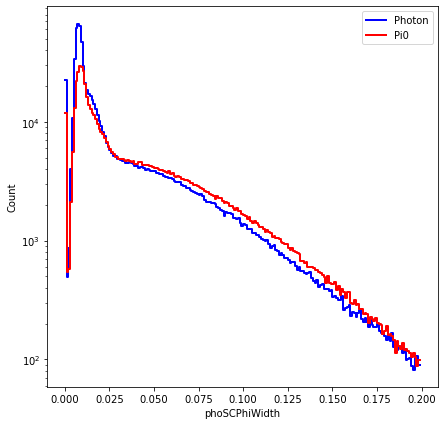

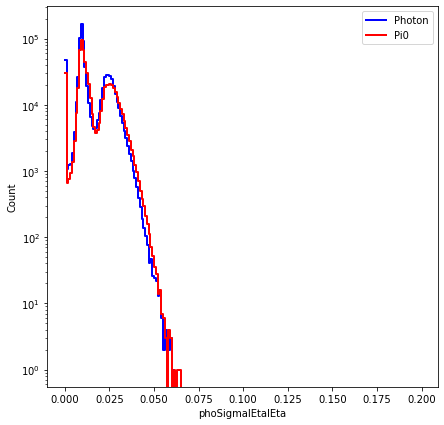

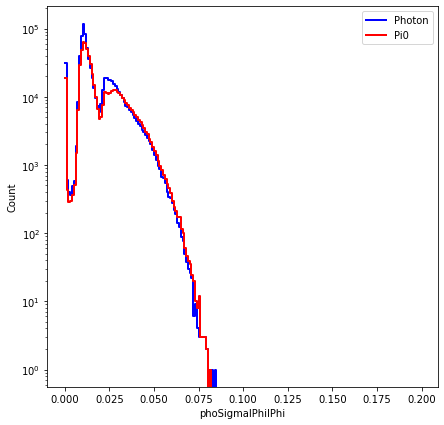

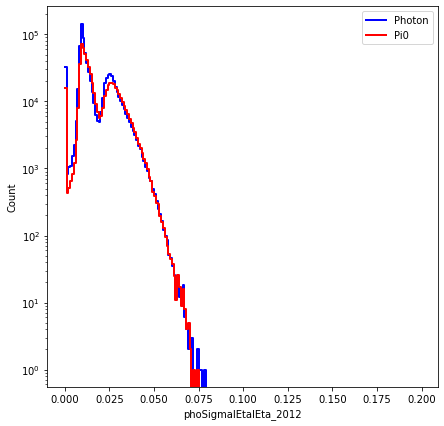

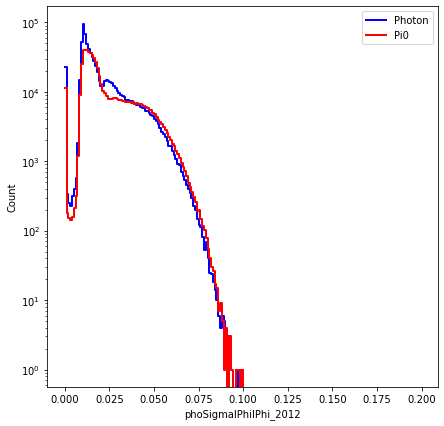

In [13]:
features_showerWidths = ['phoSCEtaWidth',
                         'phoSCPhiWidth',
                         'phoSigmaIEtaIEta',                         
                         #'phoSigmaIEtaIPhi', 
                         'phoSigmaIPhiIPhi',
                         'phoSigmaIEtaIEta_2012',                         
                         #'phoSigmaIEtaIPhi_2012',
                         'phoSigmaIPhiIPhi_2012']
for i in features_showerWidths:
    plotSingleVarBins(i,bins=np.arange(0,0.2,0.001).tolist())

## Plot IEtaIPhi 

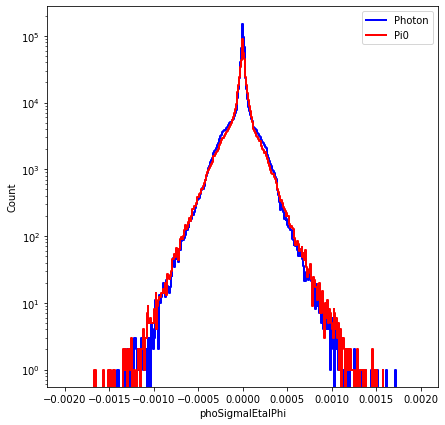

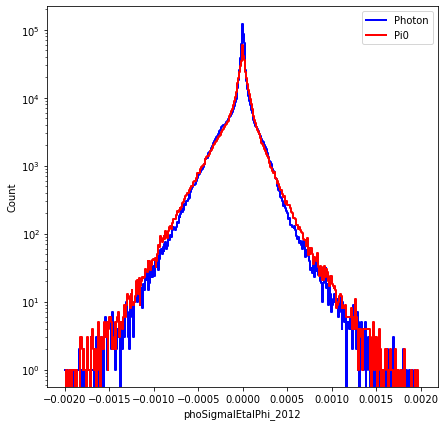

In [14]:
features_ietaiphi = ['phoSigmaIEtaIPhi', 'phoSigmaIEtaIPhi_2012']
for i in features_ietaiphi:
    plotSingleVarBins(i,bins=np.arange(-0.002,0.002,0.00001).tolist())

## Plot some ratios 

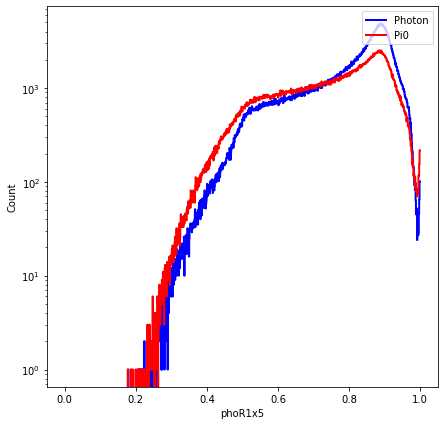

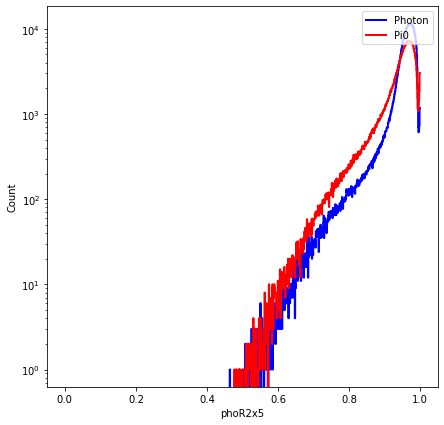

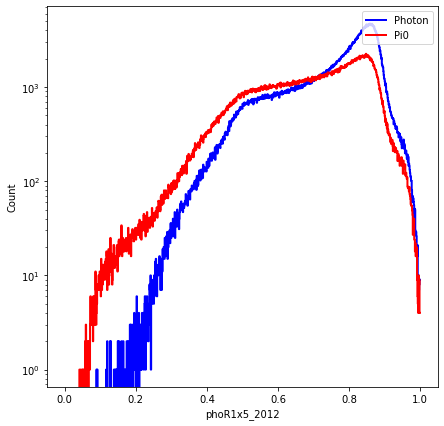

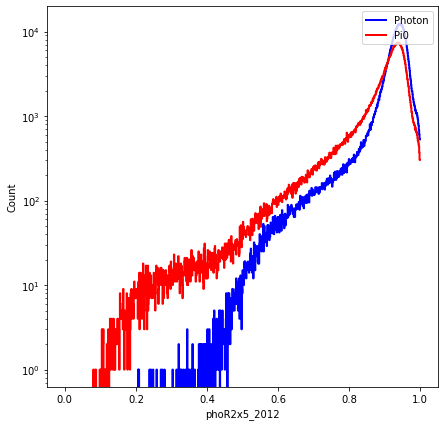

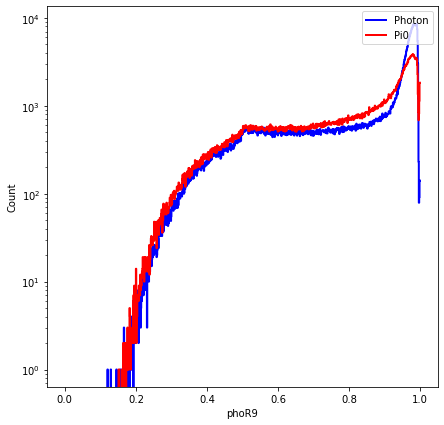

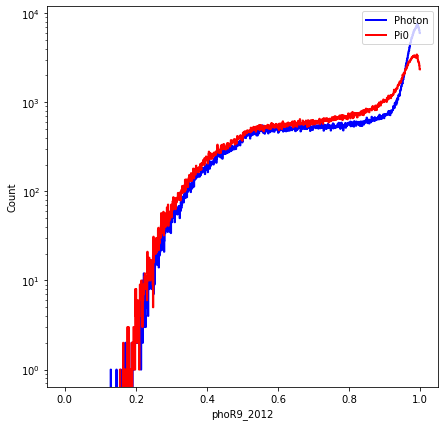

In [15]:
features_ratio_SS =[ 'phoR1x5',
                     'phoR2x5',
                     'phoR1x5_2012',
                     'phoR2x5_2012',
                     'phoR9',
                     'phoR9_2012'
                   ]
for i in features_ratio_SS:
    plotSingleVarBins(i, bins=np.arange(0,1,0.001).tolist())


## Plot swiss cross 

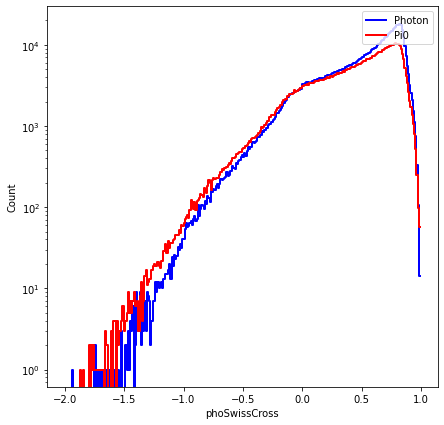

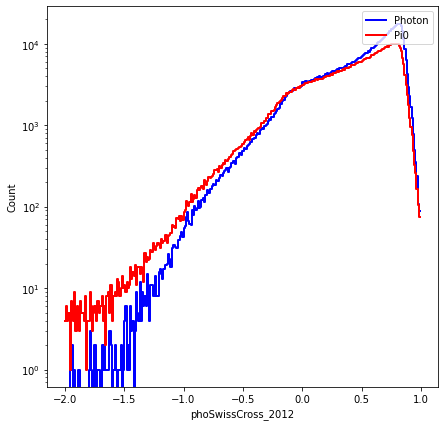

In [16]:
features_swissCross =['phoSwissCross',
                     'phoSwissCross_2012']
for i in features_swissCross:
    plotSingleVarBins(i,bins=np.arange(-2,1,0.01).tolist())

# Plot various H/E variables

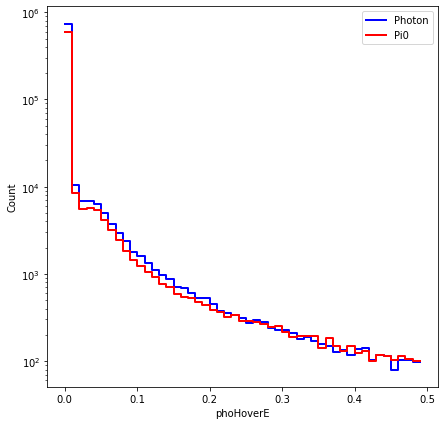

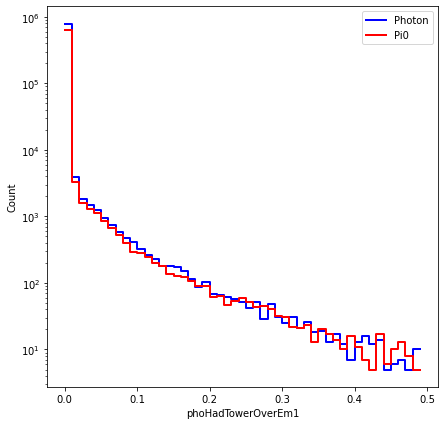

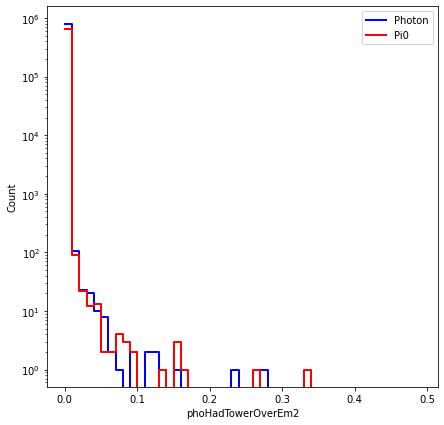

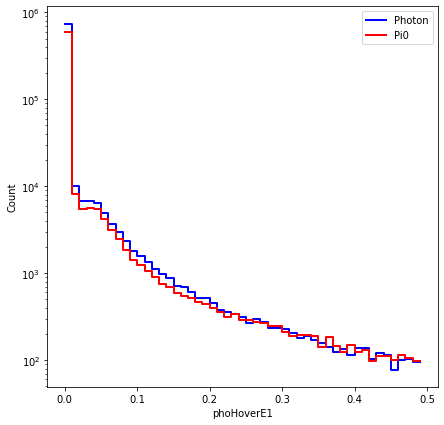

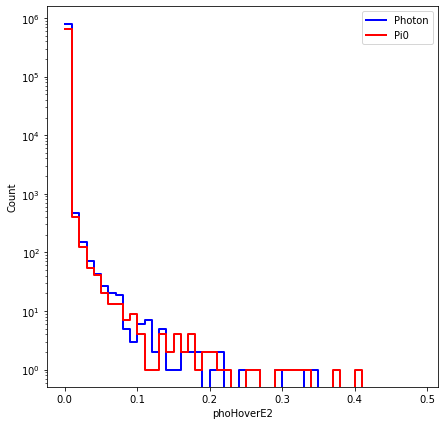

In [17]:
features_hoe = [ 
 'phoHoverE',
 'phoHadTowerOverEm1',
 'phoHadTowerOverEm2',
 'phoHoverE1',
 'phoHoverE2'
]
for i in features_hoe:
    plotSingleVarBins(i,bins=np.arange(0,0.5,0.01).tolist())

In [18]:
def plotMultipleVars(features, rows, columns):
    #rows = 6
    #columns = 5
    fig, ax = plt.subplots(rows,columns, figsize=(40,30))
    i = 0
    for r in range(rows):
        for c in range(columns):
            #print (r, c)
            if (i < len(features)):
                #print(i, features[i], r, c)
                sns.histplot(data=photon_df[features[i]], ax=ax[r,c], element="step",fill=False, linewidth=2, color="b", label = 'Photon')
                sns.histplot(data=pi0_df[features[i]],    ax=ax[r,c], element="step",fill=False, linewidth=2, color="r", label = 'Pi0')
                #sns.histplot(data=photon_df[features[i]], ax=ax[r,c], element="step",fill=False, bins=bins[i], linewidth=2, color="b", label = 'Photon')
                #sns.histplot(data=pi0_df[features[i]],    ax=ax[r,c], element="step",fill=False, bins=bins[i], linewidth=2, color="r", label = 'Pi0')
                ax[r,c].legend(loc='upper right')
                ax[r,c].set_yscale("log")
                print(type(ax[r,c]))
                
                plt.savefig('figures/{}.png'.format(features[i]))
                #plt.show()
                i+=1

In [19]:
def plotSingleVar(feature):
    fig, ax = plt.subplots(figsize=(7, 7))
    sns.histplot(data=photon_df[feature], element="step",fill=False, linewidth=2, color="b", label = 'Photon')
    sns.histplot(data=pi0_df[feature],    element="step",fill=False, linewidth=2, color="r", label = 'Pi0')
    #sns.histplot(data=photon_df[features[i]], ax=ax[r,c], element="step",fill=False, bins=bins[i], linewidth=2, color="b", label = 'Photon')
    #sns.histplot(data=pi0_df[features[i]],    ax=ax[r,c], element="step",fill=False, bins=bins[i], linewidth=2, color="r", label = 'Pi0')
    plt.legend(loc='upper right')
    ax.set_yscale("log")
    plt.savefig('figures/{}.pdf'.format(feature))